## Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, two datasets has been used:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014].
2. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error
* Comparison of the results of the models

#### Regular EDS and plotting Libraries

In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing Dataset

In [93]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 5 - Bank Marketing'

#### Loading the dataset

In [94]:
df1 = pd.read_csv('bank-full.csv', sep=';')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [95]:
df2 = pd.read_csv('bank-additional-full.csv',sep=';')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [96]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [97]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [100]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [101]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Counting the details of the last in our DataFrame

In [102]:
# Counting the values
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [103]:
# Counting the values
df2['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

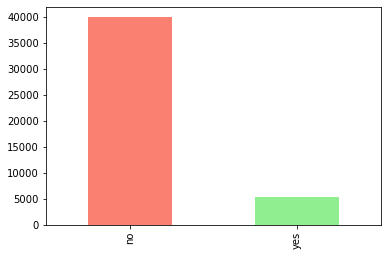

In [104]:
# Plot the value the 'y' column with a bar graph
df1['y'].value_counts().plot(kind="bar", color=["salmon", "lightgreen"]);

In [105]:
# Compare target column with sex column
pd.crosstab(df1.job, df1.y)

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


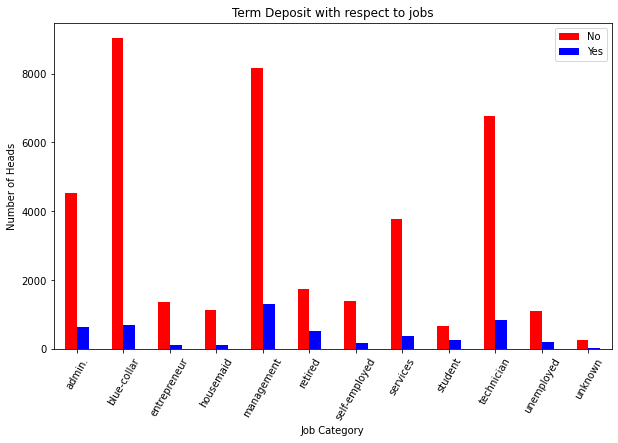

In [106]:
# Create a plot
pd.crosstab(df1.job, df1.y).plot(kind="bar", figsize=(10,6), color=["red", "blue"])

plt.title("Term Deposit with respect to jobs")
plt.xlabel("Job Category")
plt.ylabel("Number of Heads")
plt.legend(["No", "Yes"])
plt.xticks(rotation=60); 

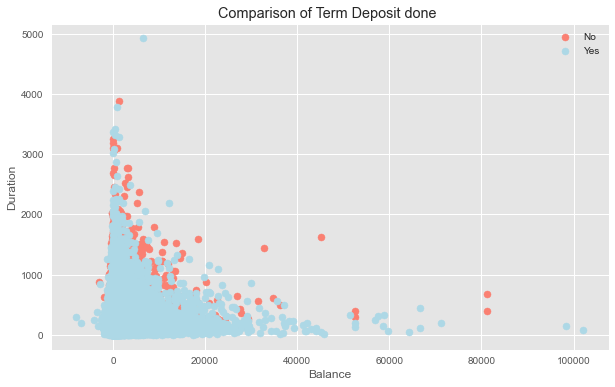

In [231]:
# Create another figure
plt.figure(figsize=(10,6))

# For positve examples
plt.scatter(df1.balance[df1.y=='yes'], 
            df1.duration[df1.y=='yes'], 
            c="salmon") # define it as a scatter figure

# For negative examples,
plt.scatter(df1.balance[df1.y=='no'], 
            df1.duration[df1.y=='no'], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Comparison of Term Deposit done ")
plt.xlabel("Balance")
plt.legend(["No", "Yes"])
plt.ylabel("Duration");

In [108]:
# Find the correlation between our independent variables
corr_matrix = df1.corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [109]:
corr_matrix = df2.corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


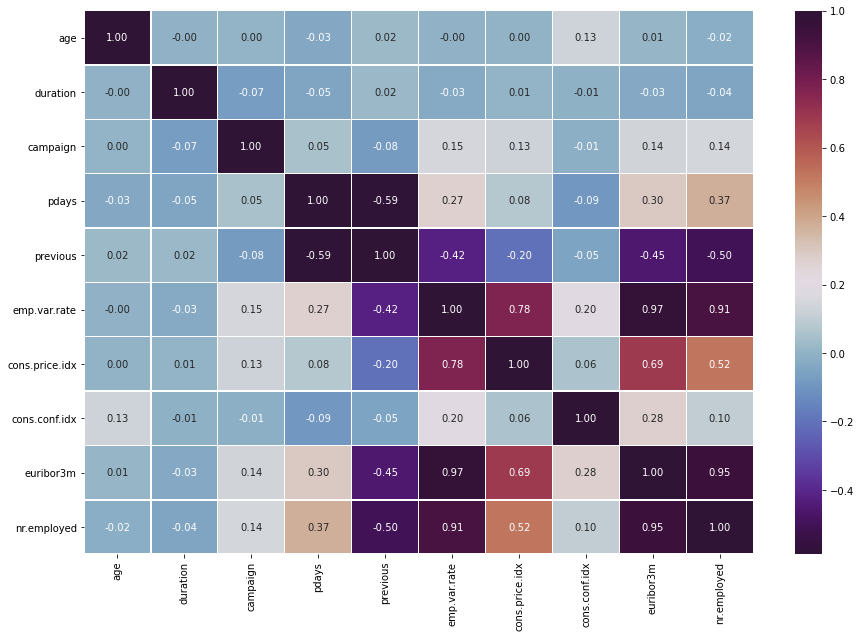

In [110]:
# Let's make it look a little prettier

corr_matrix = df2.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="twilight_shifted");

#### Modeling

In [111]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [112]:
df2.columns.value_counts().sum()

21

In [113]:
df2.reset_index(inplace=True)

In [127]:
df2

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [131]:
new_df = df2[['age', 'duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed','y']]
new_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,4.857,5191.0,no
1,57,149,1,999,0,1.1,93.994,4.857,5191.0,no
2,37,226,1,999,0,1.1,93.994,4.857,5191.0,no
3,40,151,1,999,0,1.1,93.994,4.857,5191.0,no
4,56,307,1,999,0,1.1,93.994,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,1.028,4963.6,yes
41184,46,383,1,999,0,-1.1,94.767,1.028,4963.6,no
41185,56,189,2,999,0,-1.1,94.767,1.028,4963.6,no
41186,44,442,1,999,0,-1.1,94.767,1.028,4963.6,yes


In [132]:
# Everything except target variable
X = new_df.drop("y", axis=1)

# Target variable
y = new_df["y"]

In [133]:
# Independent variables (no target column)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,4.857,5191.0


In [136]:
# The 'y' column
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

#### Splitting the data into Train & Test

In [137]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [138]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
12556,40,94,2,999,0,1.4,93.918,4.960,5228.1
35451,31,116,4,999,0,-1.8,92.893,1.244,5099.1
30592,59,13,6,999,1,-1.8,92.893,1.354,5099.1
17914,43,94,5,999,0,1.4,93.918,4.961,5228.1
3315,39,344,2,999,0,1.1,93.994,4.860,5191.0
...,...,...,...,...,...,...,...,...,...
6265,58,427,2,999,0,1.1,93.994,4.857,5191.0
11284,37,288,1,999,0,1.4,94.465,4.961,5228.1
38158,35,194,1,4,1,-3.4,92.431,0.754,5017.5
860,40,295,2,999,0,1.1,93.994,4.856,5191.0


In [139]:
y_train, len(y_train)

(12556     no
 35451     no
 30592     no
 17914     no
 3315      no
         ... 
 6265      no
 11284     no
 38158    yes
 860       no
 15795     no
 Name: y, Length: 32950, dtype: object,
 32950)

In [140]:
X_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
32884,57,371,1,999,1,-1.8,92.893,1.299,5099.1
3169,55,285,2,999,0,1.1,93.994,4.860,5191.0
32206,33,52,1,999,1,-1.8,92.893,1.313,5099.1
9403,36,355,4,999,0,1.4,94.465,4.967,5228.1
14020,27,189,2,999,0,1.4,93.918,4.963,5228.1
...,...,...,...,...,...,...,...,...,...
12322,27,584,1,999,0,1.4,93.918,4.959,5228.1
23440,41,167,7,999,0,1.4,93.444,4.964,5228.1
29431,46,142,12,999,1,-1.8,93.075,1.405,5099.1
16627,31,1327,2,999,0,1.4,93.918,4.963,5228.1


In [141]:
y_test, len(y_test)

(32884     no
 3169      no
 32206     no
 9403      no
 14020     no
         ... 
 12322    yes
 23440     no
 29431     no
 16627    yes
 1871      no
 Name: y, Length: 8238, dtype: object,
 8238)

#### Model choices

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [143]:
# Loading Linear Regression
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the model
LR_model.fit(X_train, y_train)

#predict
LR_predicted_y_test  = LR_model.predict(X_test)

#actual
LR_actual_y_test = y_test

In [144]:
LR_predicted_y_test

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [145]:
LR_actual_y_test

32884     no
3169      no
32206     no
9403      no
14020     no
        ... 
12322    yes
23440     no
29431     no
16627    yes
1871      no
Name: y, Length: 8238, dtype: object

### K-Nearest Neighbors Classifier

In [146]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [147]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(X_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(X_test)

#actual
KNN_actual_y_test = y_test

In [148]:
KNN_predicted_y_test

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [149]:
KNN_actual_y_test

32884     no
3169      no
32206     no
9403      no
14020     no
        ... 
12322    yes
23440     no
29431     no
16627    yes
1871      no
Name: y, Length: 8238, dtype: object

### RandomForest Classification

In [150]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [151]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [152]:
RF_predicted_y_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [153]:
RF_actual_y_test

32884     no
3169      no
32206     no
9403      no
14020     no
        ... 
12322    yes
23440     no
29431     no
16627    yes
1871      no
Name: y, Length: 8238, dtype: object

### SVM Classification

In [204]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [217]:
#create a model
SVM_model = SVC(kernel='linear', C = 0.01)

#model fitting
SVM_model.fit(X_test,y_test)

#prediction 
SVM_y_train_pred = SVM_model.predict(X_train)
SVM_y_test_pred = SVM_model.predict(X_test)
SVM_y_test_pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [207]:
# Let's check the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

confusion_matrix(y_test,y_test_pred)

array([[7161,  142],
       [ 642,  293]], dtype=int64)

In [208]:
# Acuracy Score
accuracy_score(y_test,y_test_pred)

0.9048312697256615

#### Model Comparison

In [218]:
print ( 'Logistic Regression:',LR_model.score(X_train,y_train),
        'K-Nearest Neighbor:',KNN_model.score(X_train,y_train),
        'Random Forest Classifier:',RF_model.score(X_train,y_train),
        'SVM Classificatier:',SVM_model.score(X_train,y_train),sep="\n")

Logistic Regression:
0.9079210925644916
K-Nearest Neighbor:
0.9416995447647951
Random Forest Classifier:
0.887556904400607
SVM Classificatier:
0.9065857359635812


<Figure size 720x1080 with 0 Axes>

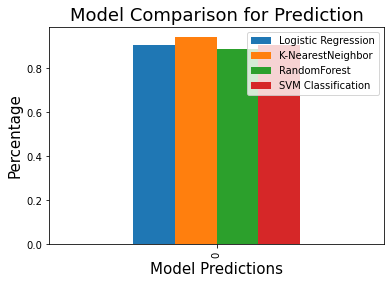

In [221]:
# A model create to visualize the comparisons of the 4 models:

A = (LR_model.score(X_train,y_train),KNN_model.score(X_train, y_train),RF_model.score(X_train,y_train),SVM_model.score(X_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(10,15))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Logistic Regression","K-NearestNeighbor","RandomForest","SVM Classification"]);